In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
df_no2 = pd.read_csv("air_quality_macrox/satellite_data/satellite_data_NO2_India.csv")
# drop the first column with redundant index information
df_no2.drop(df_no2.columns[[0]], axis=1, inplace=True)
# convert string date to datetime format
df_no2['date'] = pd.to_datetime(df_no2['date'])
df_no2

,date,Agartala,Agra,Aizwal,Amritsar,Asansol,Aurangabad,Bareilly,Belgaum,Bengaluru,...,Pondicherry,Prayagraj,Pune,Shillong,Solapur,Srinagar,Thiruvananthapuram,Varanasi,Vijaywada,Visakhapatnam
0,2004-10-01,3.179290e+15,5.020470e+15,2.064130e+15,-1.270000e+30,7.657220e+15,4.717020e+15,5.583490e+15,1.922050e+15,-1.270000e+30,...,-1.270000e+30,5.301610e+15,2.903890e+15,-1.270000e+30,2.626670e+15,-1.270000e+30,-1.270000e+30,3.779560e+15,3.113650e+15,4.025390e+15
1,2004-10-02,3.423900e+15,5.332680e+15,2.598470e+15,-1.270000e+30,5.207310e+15,-1.270000e+30,3.522500e+15,-1.270000e+30,-1.270000e+30,...,-1.270000e+30,5.940290e+15,3.024790e+15,6.527250e+15,2.866040e+15,-1.270000e+30,2.666620e+15,6.127350e+15,4.338110e+15,-1.270000e+30
2,2004-10-04,3.130680e+15,2.894550e+15,2.233770e+15,5.235600e+15,-1.270000e+30,3.938730e+15,4.109950e+15,-1.270000e+30,-1.270000e+30,...,2.200250e+15,4.889430e+15,-1.270000e+30,3.726040e+15,1.427940e+15,4.432890e+15,-1.270000e+30,5.354720e+15,-1.270000e+30,-1.270000e+30
3,2004-10-05,-1.270000e+30,4.741380e+15,-1.270000e+30,7.568870e+15,-1.270000e+30,3.453570e+15,5.237090e+15,2.655220e+15,3.540490e+15,...,1.267060e+15,3.578840e+15,-1.270000e+30,-1.270000e+30,2.720900e+15,4.082800e+15,1.562250e+15,3.612840e+15,-1.270000e+30,2.826610e+15
4,2004-10-07,-1.270000e+30,5.428970e+15,-1.270000e+30,7.917230e+15,-1.270000e+30,3.440050e+15,7.171330e+15,2.570630e+15,4.022210e+15,...,3.146320e+15,4.434340e+15,3.047850e+15,-1.270000e+30,4.215570e+15,3.630250e+15,2.069470e+15,-1.270000e+30,4.175730e+15,-1.270000e+30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2022-07-20,5.079080e+15,-1.270000e+30,4.828950e+15,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,...,4.108130e+15,5.451550e+15,-1.270000e+30,-1.270000e+30,2.759240e+15,3.806630e+15,-1.270000e+30,-1.270000e+30,5.767870e+15,6.350700e+15
6489,2022-07-22,-1.270000e+30,-1.270000e+30,1.060500e+15,4.857200e+15,8.016100e+15,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,...,4.286730e+15,-1.270000e+30,-1.270000e+30,-1.270000e+30,3.557780e+15,-1.270000e+30,2.218290e+15,-1.270000e+30,-1.270000e+30,-1.270000e+30
6490,2022-07-23,3.230520e+15,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,...,-1.270000e+30,1.961410e+15,-1.270000e+30,4.392840e+15,-1.270000e+30,-1.270000e+30,3.588550e+15,4.247500e+15,-1.270000e+30,2.788600e+15
6491,2022-08-01,-1.270000e+30,-1.270000e+30,-1.270000e+30,6.497880e+15,-1.270000e+30,4.445630e+15,-1.270000e+30,-1.270000e+30,5.117940e+15,...,4.749950e+15,-1.270000e+30,3.400850e+15,-1.270000e+30,4.391880e+15,3.262190e+15,-1.270000e+30,2.443440e+15,-1.270000e+30,-1.270000e+30


In [3]:
df_so2 = pd.read_csv("air_quality_macrox/satellite_data/satellite_data_SO2_India.csv")
# drop the first column with redundant index information
df_so2.drop(df_so2.columns[[0]], axis=1, inplace=True)
# convert string date to datetime format
df_so2['date'] = pd.to_datetime(df_so2['date'])
df_so2

,date,Agartala,Agra,Aizwal,Amritsar,Asansol,Aurangabad,Bareilly,Belgaum,Bengaluru,...,Pondicherry,Prayagraj,Pune,Shillong,Solapur,Srinagar,Thiruvananthapuram,Varanasi,Vijaywada,Visakhapatnam
0,2004-10-12,6.000000e-02,-6.500000e-01,2.122582e-02,3.268534e-02,2.200000e-01,7.064024e-02,3.600000e-01,3.387015e-02,-1.270000e+30,...,-1.270000e+30,-1.270000e+30,2.039294e-01,-1.270000e+30,-4.202187e-02,0.000000e+00,-2.627842e-02,-1.270000e+30,-1.270000e+30,-1.118448e-01
1,2004-10-13,-1.270000e+30,2.278545e-02,-1.270000e+30,8.892719e-02,-1.270000e+30,1.596642e-01,9.809843e-02,3.121292e-02,-1.270000e+30,...,-1.270000e+30,-1.287511e-01,9.583951e-02,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,1.350000e-01,-5.000000e-02,1.021318e-01
2,2004-10-16,-1.270000e+30,9.686550e-02,-1.270000e+30,-8.842058e-03,-1.270000e+30,-5.930414e-02,-1.278841e-01,6.284753e-02,-1.270000e+30,...,5.000000e-02,2.209030e-01,3.903772e-02,-1.270000e+30,5.715033e-02,8.261539e-03,1.674758e-01,-2.200000e-01,-3.000000e-02,-1.325093e-01
3,2004-10-18,-2.000000e-02,6.895887e-02,3.853131e-03,1.558788e-02,-3.000000e-02,1.500409e-01,1.338054e-01,-4.557317e-02,-1.270000e+30,...,-1.270000e+30,2.950928e-02,6.006106e-02,6.000000e-02,9.486453e-02,2.050619e-01,2.900158e-01,4.000000e-02,-1.270000e+30,2.039290e-01
4,2004-10-19,2.200000e-01,-1.270000e+30,-1.088919e-01,1.418830e-02,4.800000e-01,5.748568e-03,1.220821e-01,7.032677e-02,-1.270000e+30,...,-1.270000e+30,-1.461275e-02,1.114001e-01,1.800000e-01,2.729621e-02,2.200000e-01,1.533333e-01,3.700000e-01,-1.270000e+30,5.816908e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,2022-07-21,-1.270000e+30,3.099111e-01,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,3.000000e-02,-1.270000e+30,...,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-5.338941e-02,-1.270000e+30,3.200000e-01,1.014236e-01
6478,2022-07-22,-1.270000e+30,-1.270000e+30,-4.140878e-02,2.500000e-01,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,...,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30
6479,2022-07-23,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,...,-1.270000e+30,1.299445e-01,-1.270000e+30,2.000000e-02,-1.270000e+30,-1.270000e+30,-3.556816e-02,5.000001e-02,-1.270000e+30,-1.309317e-01
6480,2022-07-24,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,...,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,-1.270000e+30,1.200000e-01,-1.270000e+30,-1.270000e+30


In [4]:
df_co = pd.read_csv("air_quality_macrox/satellite_data/satellite_data_CO_India.csv")
# drop the first column with redundant index information
df_co.drop(df_co.columns[[0]], axis=1, inplace=True)
# convert string date to datetime format
df_co['date'] = pd.to_datetime(df_co['date'])
df_co

,date,Agartala,Agra,Aizwal,Amritsar,Asansol,Aurangabad,Bareilly,Belgaum,Bengaluru,...,Pondicherry,Prayagraj,Pune,Shillong,Solapur,Srinagar,Thiruvananthapuram,Varanasi,Vijaywada,Visakhapatnam
0,2002-08-31,117.695890,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,107.625965,-9999.0,...,126.194209,-9999.0,114.378054,-9999.000000,-9999.0,-9999.0,102.154445,-9999.0,132.364221,132.946298
1,2002-09-01,117.754098,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.0,...,-9999.000000,-9999.0,-9999.000000,-9999.000000,-9999.0,-9999.0,-9999.000000,-9999.0,-9999.000000,131.898560
2,2002-09-03,119.325705,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.0,...,-9999.000000,-9999.0,-9999.000000,123.167410,-9999.0,-9999.0,108.848326,-9999.0,-9999.000000,-9999.000000
3,2002-09-05,120.839104,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.0,...,-9999.000000,-9999.0,131.316483,129.221007,-9999.0,-9999.0,109.430403,-9999.0,-9999.000000,-9999.000000
4,2002-09-07,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.0,...,122.003257,-9999.0,111.409463,136.671588,-9999.0,-9999.0,104.308128,-9999.0,122.468919,118.452590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7175,2021-04-10,178.813934,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.0,...,115.251169,-9999.0,-9999.000000,-9999.000000,-9999.0,-9999.0,-9999.000000,-9999.0,162.632205,155.696460
7176,2021-04-17,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.0,...,128.173269,-9999.0,-9999.000000,-9999.000000,-9999.0,-9999.0,127.474777,-9999.0,122.818165,142.667838
7177,2021-04-26,119.674951,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.0,...,118.976459,-9999.0,-9999.000000,-9999.000000,-9999.0,-9999.0,-9999.000000,-9999.0,149.011612,155.102292
7178,2021-05-03,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.0,...,120.024197,-9999.0,-9999.000000,-9999.000000,-9999.0,-9999.0,120.955519,-9999.0,129.221007,145.294456


In [5]:
# Identify the value that is NaN for this data. These values are unreasonably large, are negative
# (not physically relevant), and are acting as identifiers of NaN.
nan_no2 = df_no2.iloc[0,4]
nan_so2 = df_so2.iloc[1,1]
nan_co = df_co.iloc[0,2]

nan = pd.DataFrame([['NO2', nan_no2],['SO2', nan_so2],['CO', nan_co]],
                   columns=['Atmospheric Gas', 'NaN Value'])
nan

,Atmospheric Gas,NaN Value
0,NO2,-1.270000e+30
1,SO2,-1.270000e+30
2,CO,-9.999000e+03


In [6]:
# replace these NaN values with NAN
df_no2 = df_no2.replace(nan_no2, np.NaN)
df_so2 = df_so2.replace(nan_so2, np.NaN)
df_co = df_co.replace(nan_co, np.NaN)

<AxesSubplot:>

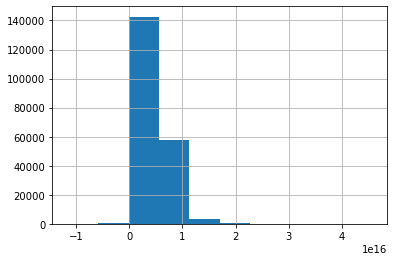

In [7]:
df_no2.iloc[:,1:55].stack().hist()

<AxesSubplot:>

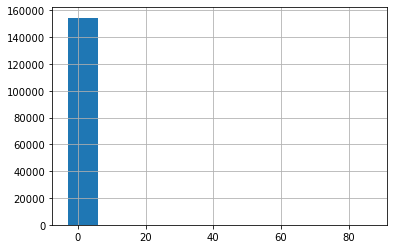

In [8]:
df_so2.iloc[:,1:55].stack().hist()

In [9]:
#so2_mean = np.nanmean(df_so2.iloc[:,1:55].to_numpy())
#so2_six_s = 6 * np.nanstd(df_so2.iloc[:,1:55].to_numpy())
#so2_mean + so2_six_s

In [10]:
# investigate values of so2 data greater than five
df_so2.iloc[:,1:55].to_numpy()[df_so2.iloc[:,1:55].to_numpy() > 8]

array([11.7799997 ,  8.60584164,  9.57062721, 10.7200003 , 11.9765024 ,
        9.01000023,  8.42647648, 10.8321829 , 25.2375927 , 12.2432127 ,
       25.0599995 , 10.7403498 , 11.8199997 ,  9.7815094 , 86.8401413 ,
       18.7392082 , 12.4099998 , 73.0299988 ])

<AxesSubplot:>

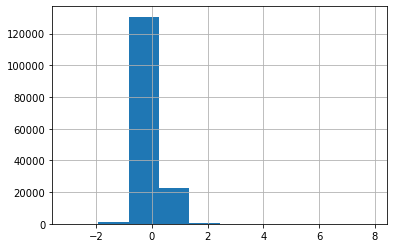

In [11]:
# create a new histogram showing SO2 data with values > 8 changed to NaN
df = df_so2.iloc[:,1:55].where(df_so2.iloc[:,1:55] < 8, nan_so2).replace(nan_so2, np.NaN)
df.stack().hist()

In [12]:
# check number of NaN's before and after
np.isnan(df_so2.iloc[:,1:55].to_numpy()).sum()

195398

In [13]:
# for SO2 replace all values in dataframe > 8 with NaN
df_so2.iloc[:,1:55] = df_so2.iloc[:,1:55].where(df_so2.iloc[:,1:55] < 8, nan_so2)
df_so2 = df_so2.replace(nan_so2, np.NaN)

In [14]:
# this result should add 18 NaN's to SO2 dataframe
np.isnan(df_so2.iloc[:,1:55].to_numpy()).sum()

195416

### Reference for missingno library
Bilogur, (2018). Missingno: a missing data visualization suite. Journal of Open Source Software, 3(22), 547, https://doi.org/10.21105/joss.00547

<AxesSubplot:>

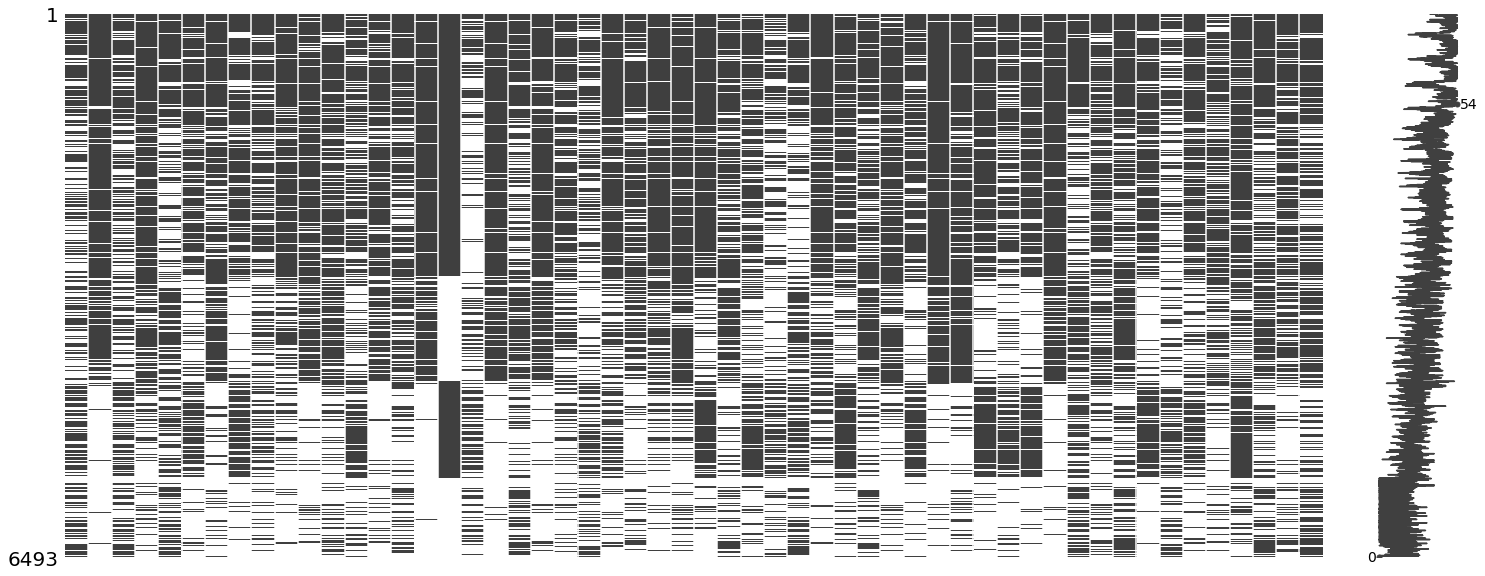

In [15]:
msno.matrix(df_no2.iloc[:,1:55])

<AxesSubplot:>

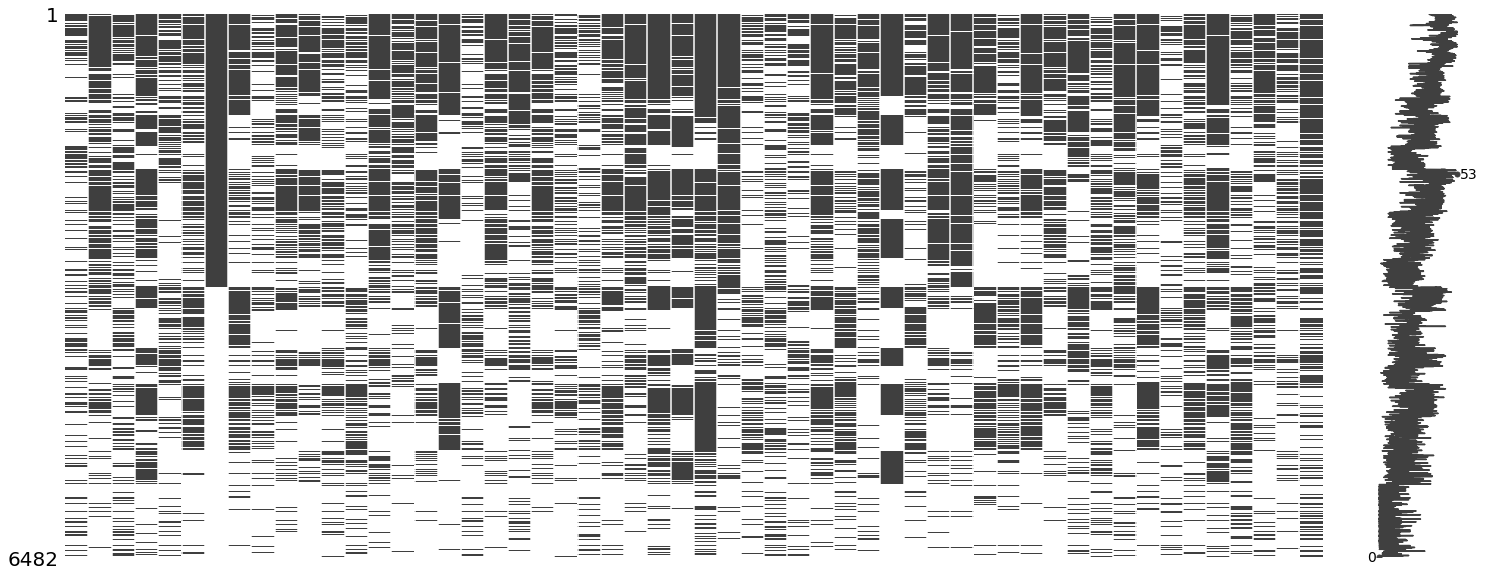

In [16]:
msno.matrix(df_so2.iloc[:,1:55])

<AxesSubplot:>

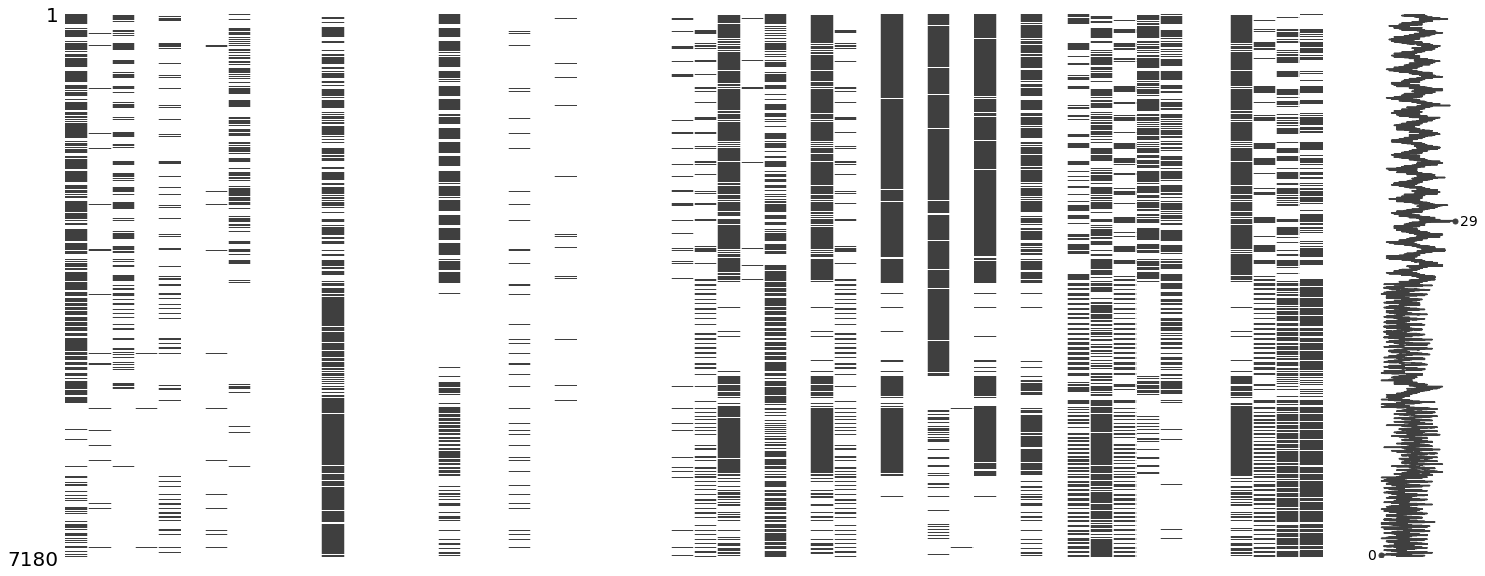

In [17]:
msno.matrix(df_co.iloc[:,1:55])

### Satellite CO gas data should not be used for further analysis
From the above plot, it appears that missing values are somewhat a function of the position of the first letter of the city name &mdash; many more columns have missing values towards the beginning of the alphabet (white areas). This seems to be extremely unlikely. Also the vertical plot to the rignt of the main plot shows a change in frequency of missingness that would be difficult to account for. These patterns are not observed for NO<sub>2</sub> or SO<sub>2</sub> data.

<AxesSubplot:>

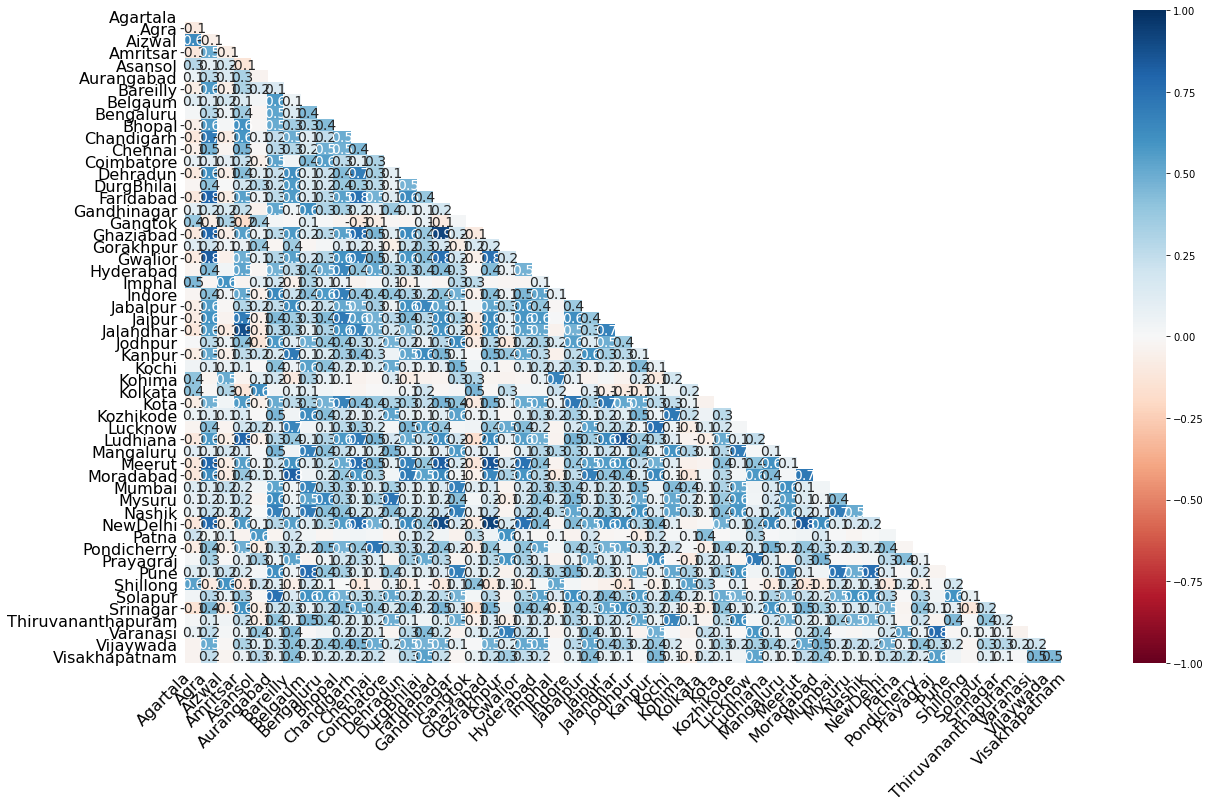

In [18]:
msno.heatmap(df_no2.iloc[:,1:55])

<AxesSubplot:>

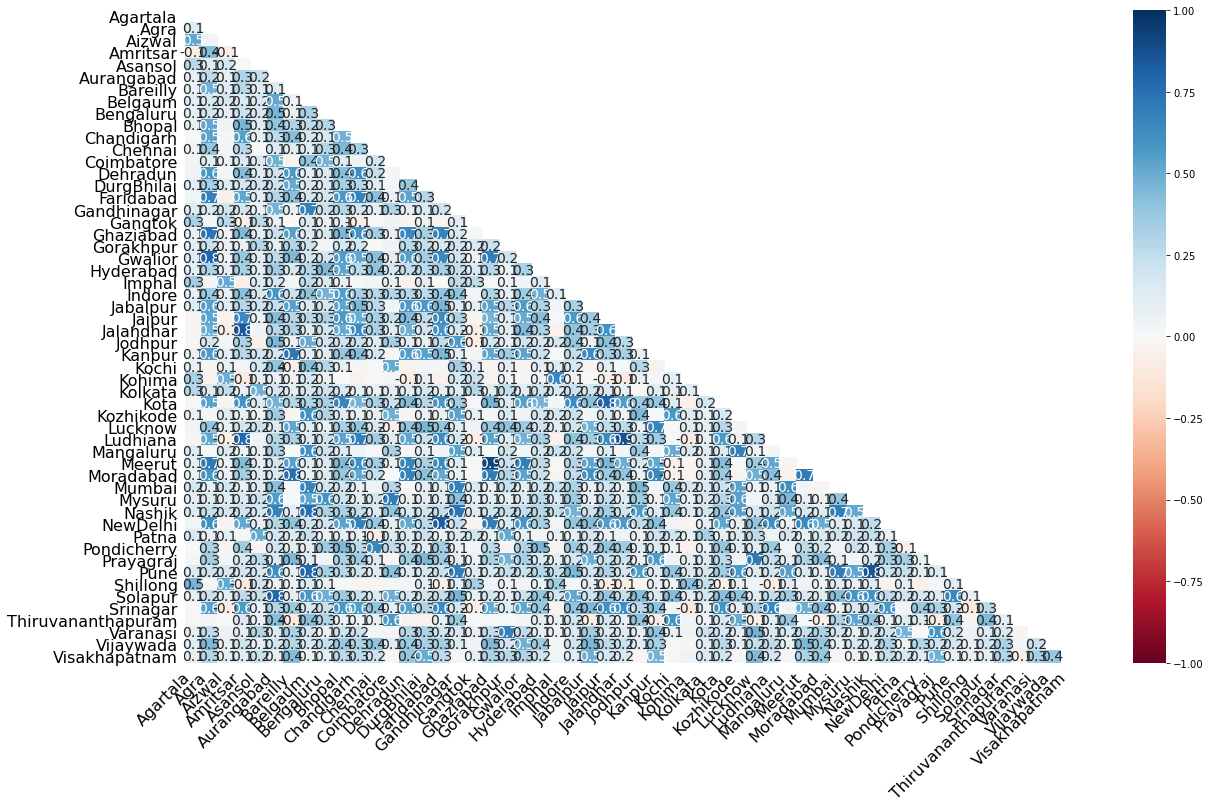

In [19]:
msno.heatmap(df_so2.iloc[:,1:55])

<AxesSubplot:>

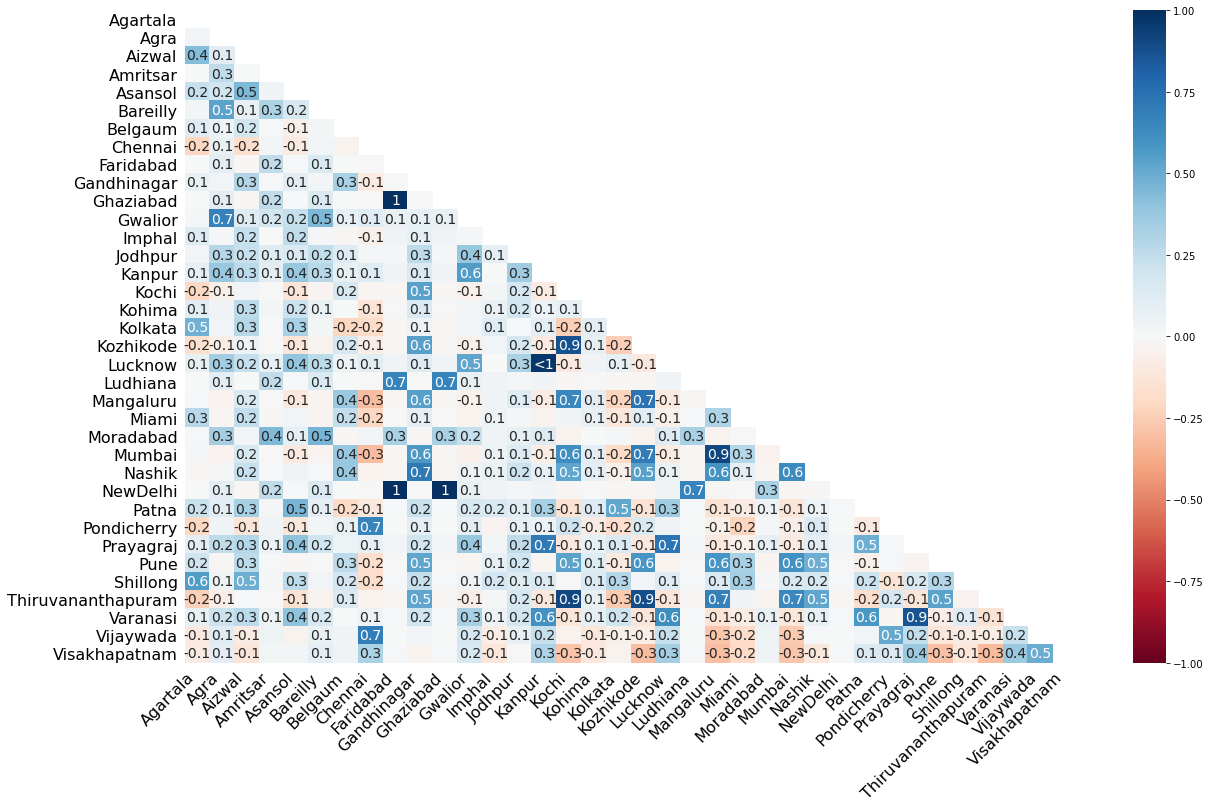

In [20]:
msno.heatmap(df_co.iloc[:,1:55])

### More evidence of irregular missing CO data
The heatmaps of NO<sub>2</sub> and SO<sub>2</sub> display an expected pattern &mdash; the missingness for each city's CO concentration  is positively correlated with other cities missingness (most colors are shades of blue). However, the heatmap for CO shows some negative correlation. It would be difficult explain why one city often has missing CO measurements, while, at the same time, the other city usually has a measurement.

In [21]:
df_no2_off = pd.read_csv('no2_official_red.csv')
df_so2_off = pd.read_csv('so2_official_red.csv')
df_pm_off = pd.read_csv('pm_official_red.csv')
df_co_off = pd.read_csv('co_official_red.csv')

In [22]:
# convert dates to datetime format
df_no2_off['date'] = pd.to_datetime(df_no2_off['date'])
df_so2_off['date'] = pd.to_datetime(df_so2_off['date'])
df_pm_off['date'] = pd.to_datetime(df_pm_off['date'])
df_co_off['date'] = pd.to_datetime(df_co_off['date']) 

In [23]:
# start satallite dateframes at Jan 1, 2018
df_no2 = df_no2[df_no2['date'] >= '2018-1-1']
df_so2 = df_so2[df_so2['date'] >= '2018-1-1']

In [24]:
# merge data frames--satellite NO2 and SO2 with official station data (NO2, SO2, PM2.5 and CO)
df1 = df_no2_off.merge(df_so2_off.merge(df_no2, on='date', how = 'outer'), on='date', how = 'outer')
df2 = df_pm_off.merge(df_co_off.merge(df_so2, on='date', how ='outer'), on='date', how ='outer')
df_2018_2022 = df1.merge(df2, on='date', how ='outer')
df_2018_2022

,date,Agra_NO2_1,Amritsar_NO2_1,Aurangabad_NO2_1,Bengaluru_NO2_6,Bengaluru_NO2_7,Bengaluru_NO2_8,Bengaluru_NO2_9,Bengaluru_NO2_10,Chennai_NO2_1,...,Pondicherry_y,Prayagraj_y,Pune_y,Shillong_y,Solapur_y,Srinagar_y,Thiruvananthapuram_y,Varanasi_y,Vijaywada_y,Visakhapatnam_y
0,2018-01-01,50.29,30.43,53.19,NaN,NaN,39.43,4.91,1.17,48.26,...,NaN,NaN,0.104761,-0.59,-0.107022,NaN,0.128803,NaN,NaN,NaN
1,2018-01-02,51.22,30.82,51.09,NaN,NaN,35.23,4.89,1.25,40.28,...,NaN,NaN,NaN,NaN,0.082703,0.220030,NaN,NaN,NaN,0.016585
2,2018-01-03,54.00,29.99,52.58,NaN,NaN,28.95,5.12,1.23,43.46,...,0.006667,NaN,0.221006,NaN,0.175612,0.099747,NaN,NaN,NaN,NaN
3,2018-01-04,50.87,NaN,51.63,NaN,NaN,23.96,4.79,2.04,59.27,...,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,1.08,-0.133060
4,2018-01-05,53.11,NaN,59.25,NaN,NaN,24.43,5.06,7.28,63.01,...,NaN,NaN,NaN,0.12,-0.151481,0.004948,0.157493,NaN,-0.17,0.192865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,2022-08-17,2.35,38.59,11.69,19.63,NaN,NaN,16.46,3.36,25.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1690,2022-08-18,0.36,46.98,11.81,19.48,NaN,10.42,16.48,1.86,29.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1691,2022-08-19,0.39,47.57,NaN,19.43,NaN,10.37,16.41,4.27,32.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1692,2022-08-20,0.95,46.25,NaN,18.64,NaN,10.44,16.41,2.46,32.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

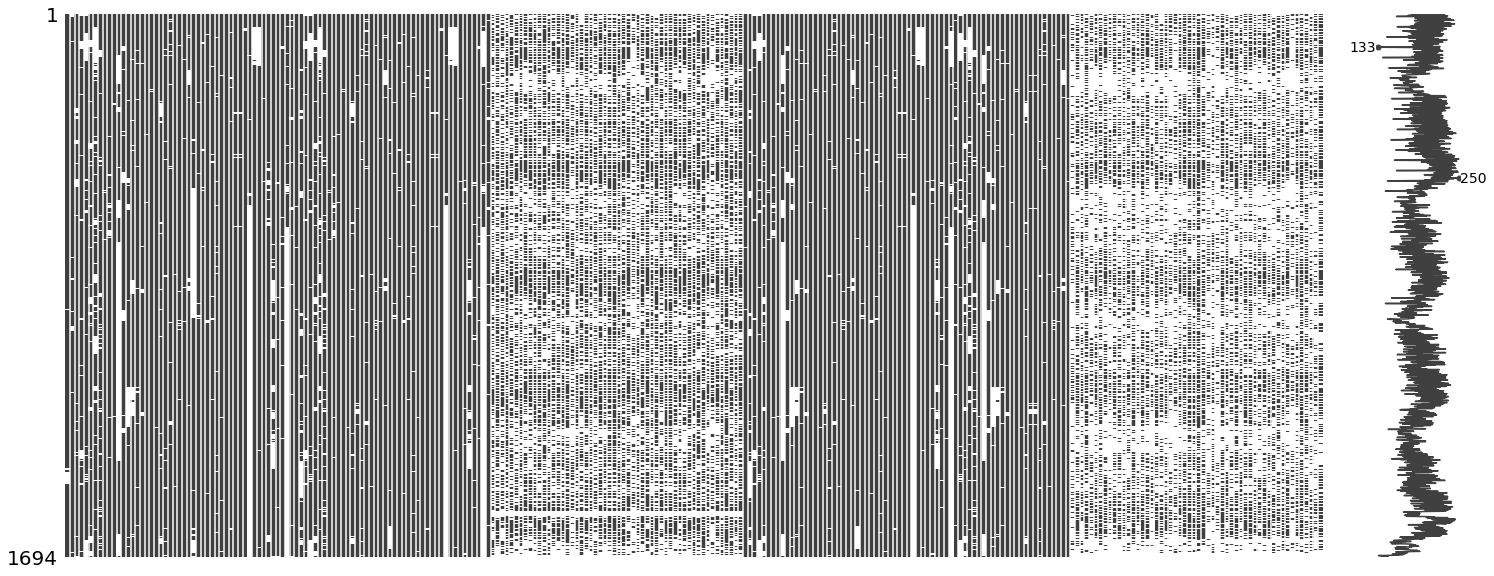

In [25]:
# look at missing values of combined dataset
msno.matrix(df_2018_2022.iloc[:,1:271])

#### Next step for combined dataset
This dataset will be exported as csv's to be brought into R so the package 'softImpute' can possibly perform matrix completion (to fill in missing values) on the training data (November 24, 2020 to December 31, 2021), the validation data (January 1, 2022 to August 21, 2022) and the data that will be used to recreate the API data set (January 1, 2018 to November 23, 2020). R has other missing value imputation libraries, such as "missForest" that could also be investigated.

In [26]:
df_generate_api = df_2018_2022[df_2018_2022['date'] <= '2020-11-23']
df_train = df_2018_2022[(df_2018_2022['date'] >= '2020-11-24') & (df_2018_2022['date'] <= '2021-12-31')]
df_validation = df_2018_2022[df_2018_2022['date'] >= '2022-1-1']

In [27]:
# check if any column has almost all NaN's
np.where(pd.array(df_train.isnull().sum(axis=0)) > 400)

(array([ 40,  48,  82,  90, 182, 190], dtype=int64),)

In [28]:
np.where(pd.array(df_validation.isnull().sum(axis=0)) > 230)

(array([ 40,  48,  82,  90, 182, 190], dtype=int64),)

In [29]:
np.where(pd.array(df_generate_api.isnull().sum(axis=0)) > 1000)

(array([], dtype=int64),)

In [30]:
#list the name of the columns that have almost all NaN's and should be removed
np.array(list(df_train.columns))[np.where(pd.array(df_train.isnull().sum(axis=0)) > 350)]

array(['Lucknow_NO2_1', 'Vijayawada_NO2_1', 'Lucknow_SO2_1',
       'Vijayawada_SO2_1', 'Lucknow_PM2.5_1', 'Vijayawada_PM2.5_1'],
      dtype='<U26')

In [31]:
df_train.shape

(403, 270)

In [32]:
# delete column with almost all NaN's
cols = np.where(pd.array(df_train.isnull().sum(axis=0)) > 400)
df_train = df_train.drop(df_train.columns[cols], axis=1)

In [33]:
df_train.shape

(403, 264)

In [34]:
df_validation.shape

(233, 270)

In [35]:
df_validation = df_validation.drop(df_validation.columns[cols], axis=1)

In [36]:
df_validation.shape

(233, 264)

In [37]:
df_generate_api.shape

(1058, 270)

In [38]:
df_generate_api = df_generate_api.drop(df_generate_api.columns[cols], axis=1)

In [39]:
df_generate_api.shape

(1058, 264)

In [40]:
df_train.isnull().all(axis=0).all()

False

In [41]:
df_validation.isnull().all(axis=0).all()

False

In [42]:
df_generate_api.isnull().all(axis=0).all()

False

In [43]:
df_generate_api.to_csv('generate_api_data.csv', encoding='utf-8', index=False)
df_train.to_csv('training.csv', encoding='utf-8', index=False)
df_validation.to_csv('validation.csv', encoding='utf-8', index=False)